## Quantum Physics Sheet 1 Q1

This is about Millikan's experiment on photoelectric effect.

In one of Millikan's experiments, a clean sodium surface was irradiated by light having
various wavelenths $\lambda$, and the emitted electrons subjected to a retarding voltage $V$ . The
electron current was determined from the deflection $d$ of an electrometer accumulating
charge for $30\ {\rm s}$. From the following tabulated results, estimate the stopping potential for
each wavelength, and hence determine Planck'c constant $\hbar$, and the work function $W_{\rm Na}$
of sodium.

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Import data
Lambda = [546, 434, 405, 365, 313] # in nm
V = [
    [0.253, 0.305, 0.358, 0.410],
    [0.829, 0.881, 0.934, 0.986],
    [0.934, 0.956, 1.039, 1.091, 1.143],
    [1.353, 1.405, 1.458, 1.510, 1.562],
    [1.929, 1.981, 2.034, 2.086, 2.138]
] # in V
d = [
    [28, 14, 7, 3],
    [44, 20, 10, 4],
    [82, 55, 36, 24, 3],
    [67.5, 36, 19, 11, 4],
    [52, 29, 12, 5, 2.5]
] # in mm
# The spectrum is from ultraviolet to approx. middle green
colors = plt.cm.rainbow(np.linspace(0.6, 0, 5))

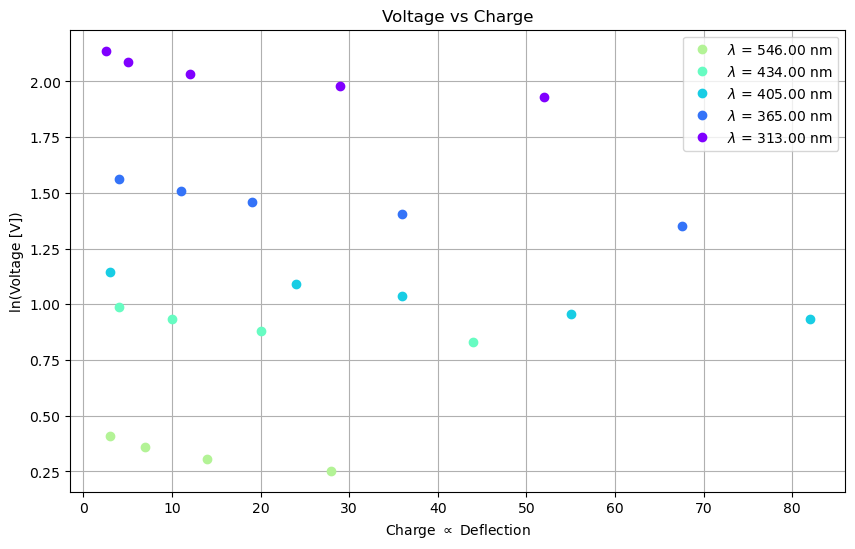

In [2]:
# Visualise the results. Suppose the charge on the electrometer is proportional to the deflection. 
plt.figure(figsize=(10,6))
plt.title(r"Voltage vs Charge")
plt.xlabel(r"Charge $\propto$ Deflection")
plt.ylabel(r"ln(Voltage [V])")
for i in range(len(d)):
    plt.plot(d[i], V[i], 'o', color = colors[i], label=r"$\lambda$ = {:.2f} nm".format(Lambda[i]))
plt.legend(loc = 'upper right')
plt.grid(True)
plt.show()

The relationship between V and Charge should be linear when temperature is absolute zero, but it is not due to the Fermi-Dirac distribution at high temperatures. We shall roughly estimate the stopping voltage by taking the voltage at $\text{Charge}\rightarrow\infty$. 

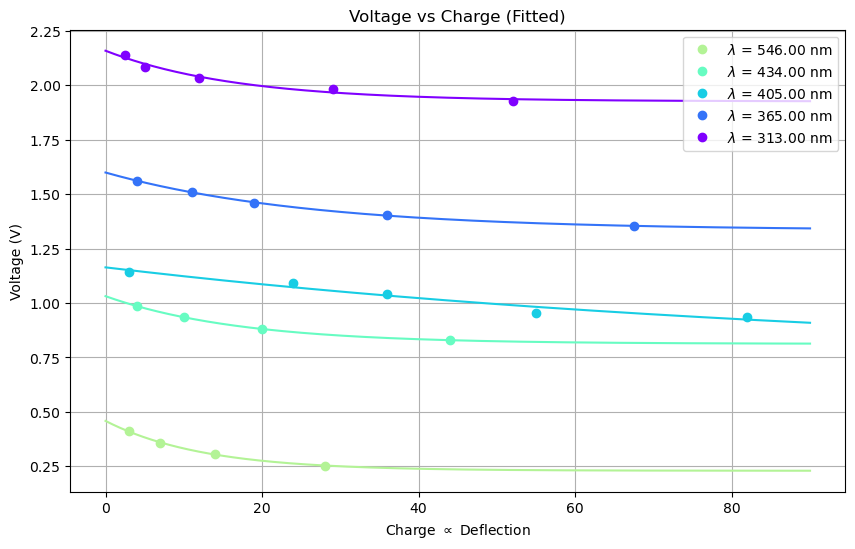

In [3]:
# Fit the exponential function for each V and d sets
def exp(d, a, b, c):
    return a * np.exp(-b * d) + c

# Apply curve fitting to each V and d set
a = []
b = []
c = []
for i in range(len(d)):
    popt, pcov = curve_fit(exp, d[i], V[i], p0=[1, 0.1, 1])
    a.append(popt[0])
    b.append(popt[1])
    c.append(popt[2])

# Plot the fitted curves
drange = np.linspace(0, 90, 1000)
plt.figure(figsize=(10,6))
plt.title(r"Voltage vs Charge (Fitted)")
plt.xlabel(r"Charge $\propto$ Deflection")
plt.ylabel(r"Voltage (V)")
for i in range(len(d)):
    plt.plot(d[i], V[i], 'o', color = colors[i], label=r"$\lambda$ = {:.2f} nm".format(Lambda[i]))
    plt.plot(drange, exp(drange, a[i], b[i], c[i]), color = colors[i])
plt.legend(loc = 'upper right')
plt.grid(True)
plt.show()

In [4]:
# The fitted parameter c is the stopping potential V_0 in volts
print(c)

[0.22932913497587254, 0.8122613976659103, 0.7341630862321081, 1.3340878408402301, 1.9259240834333298]


The slope of the linear relationship is 1250.5866446312464
The intercept of the linear relationship is -2.1291679520567715


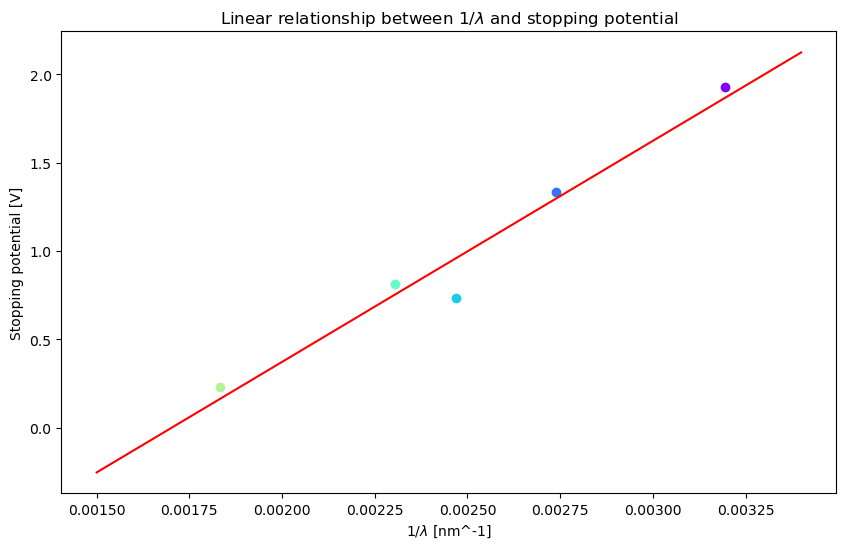

In [5]:
# Stopping potential should behave linearly with 1/lambda.
relambda = []
for i in range(len(Lambda)):
    relambda.append(1/Lambda[i])

def linear(l, e, f):
    return e*l + f

popt, pcov = curve_fit(linear, relambda, c)
print('The slope of the linear relationship is', popt[0])
print('The intercept of the linear relationship is', popt[1])

relambda_range = np.arange(1.5E-3, 3.5E-3, 1E-4)
# Plotting the linear relationship
plt.figure(figsize=(10, 6))
for i in range(len(Lambda)):
    plt.plot(relambda[i], c[i], 'o', color = colors[i])
plt.plot(relambda_range, linear(relambda_range, popt[0], popt[1]), color = 'red')
plt.xlabel(r'$1/\lambda$ [nm^-1]')
plt.ylabel(r'Stopping potential [V]')
plt.title(r'Linear relationship between $1/\lambda$ and stopping potential')
plt.show()

Now we know that the slope is $1250.6\ {\rm V\cdot nm}=1.2506\times 10^{-6}\ {\rm V\cdot m}$, from our theory,
$$
V_0=\frac{2\pi\hbar c}{e\lambda}-\frac{W}{e}=\frac{k}{\lambda}+C,
$$
$\hbar$ can be expressed as
$$
\hbar = \frac{e}{2\pi c}k = 1.064\times 10^{-34}\ {\rm J\cdot s}.
$$
And the work function for sodium is
$$
W=-eC=2.13\ {\rm eV}=3.41\times 10^{-19}\ {\rm J}.
$$
Our estimated work function is quite close to the reference value $2.3\ {\rm eV}$, $\hbar$ is also close to reference $1.0546\times 10^{-34}\ {\rm J\cdot s}$, with an error of about one part in a hundred. 